<h1 align='center'> CPE 695-A Project </h1> 

<h2 align="center"> Amazon Reviews Sentiment Analysis </h2>

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import json
import seaborn as sns
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_json('Musical_Instruments_5.json',lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [3]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [5]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

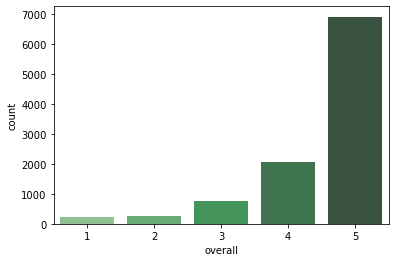

In [7]:
sns.countplot(x="overall" ,data=df, palette= "Greens_d" )

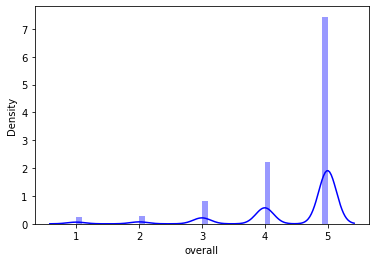

In [8]:
plot = sns.distplot(df.overall, kde="False", color="b")

In [9]:
new = df["reviewTime"].str.split(",", n = 1, expand = True) 
 
df["date"]= new[0] 
df["year"]= new[1] 

df=df.drop(['reviewTime'], axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,date,year
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,02 28,2014
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,03 16,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,08 28,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,02 14,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,02 21,2014


In [10]:
def target(rating):
    if rating['overall'] > 3:
        return 1
    elif rating['overall'] <3:
        return 0
    else:
        return 2

In [11]:
df['sentiment'] = df.apply(target, axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,date,year,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,02 28,2014,1
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,03 16,2013,1
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,08 28,2013,1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,02 14,2014,1
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,02 21,2014,1


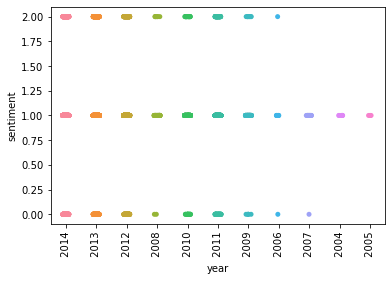

In [53]:
#plt.figure(figsize = (16,8))
p = sns.stripplot(x= "year" , y= "sentiment" , data=df)
a = plt.xticks(rotation=90)

<AxesSubplot:xlabel='year', ylabel='sentiment'>

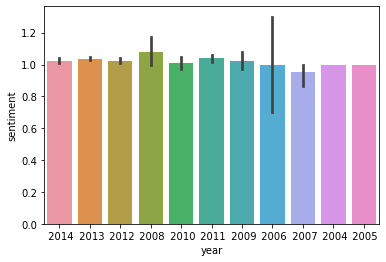

In [54]:
sns.barplot("year", "sentiment", data=df)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

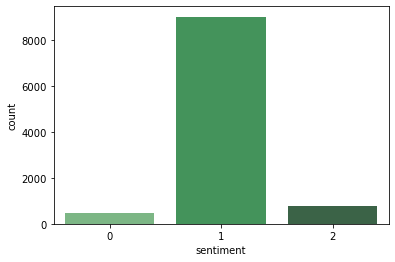

In [12]:
sns.countplot(x="sentiment" ,data=df, palette= "Greens_d" )

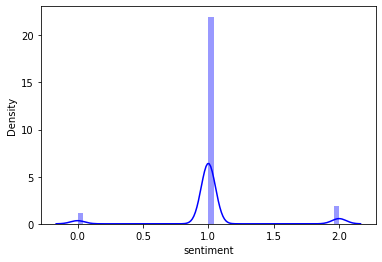

In [13]:
plot = sns.distplot(df.sentiment, kde="False", color="b")

In [14]:
n1 = df["helpful"].astype(str).str.split(",", n = 1, expand = True)
n2 = n1[0].str.split("[", n = 1, expand = True)
n3 = n1[1].str.split("]", n = 1, expand = True)

n2.reset_index(drop=True, inplace=True)
n3.reset_index(drop=True, inplace=True)

n2=n2.drop([0], axis=1)
n3=n3.drop([1], axis=1)

hl=pd.concat([new2, new3], axis=1)

def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

hl= trim_all_columns(hl)

hl[0]=hl[0].astype(str).astype(int)
hl[1]=hl[1].astype(str).astype(int)

try:
    hl['result'] = hl[1]/hl[0]
except ZeroDivisionError:
    hl['result']=0

hl['result'] = hl['result'].fillna(0)

hl['result']=hl['result'].round(2) 

df['h_r']=hl['result']

df=df.drop(['helpful'], axis=1)

In [15]:
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,date,year,sentiment,helpful_rate
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5,good,1393545600,02 28,2014,1,0.00
1,A14VAT5EAX3D9S,1384719342,Jake,The product does exactly as it should and is q...,5,Jake,1363392000,03 16,2013,1,0.93
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,08 28,2013,1,1.00
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,02 14,2014,1,0.00
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,02 21,2014,1,0.00


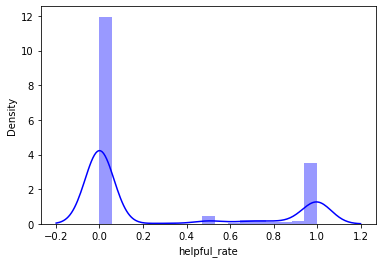

In [16]:
plot = sns.distplot(df.helpful_rate, kde="False", color="b")

In [17]:
df=df.drop(['reviewerName','unixReviewTime'], axis=1)

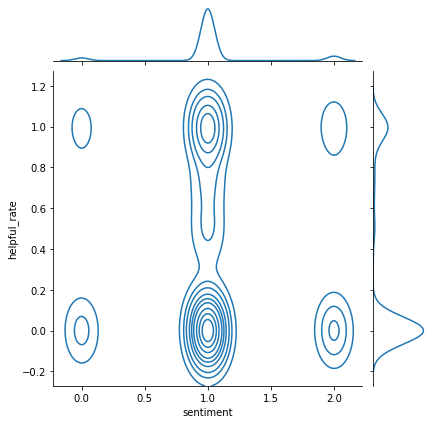

In [18]:
sns.jointplot("sentiment", "helpful_rate",  data=df, kind="kde")

<AxesSubplot:xlabel='sentiment', ylabel='helpful_rate'>

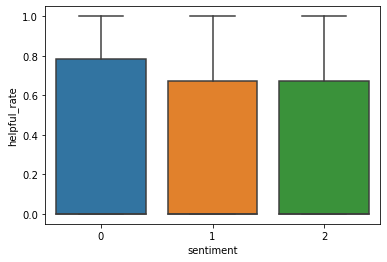

In [19]:
sns.boxplot(y="h_r" ,x="sentiment" ,data=df)

In [20]:
def final_words():
    corpus=[]
    stop_words=set(stopwords.words('english'))
    for content in (df['reviewText'].values):
        content=re.sub(r'[^\w\s]',' ',str(content))
        content=re.sub(r'^https?:\/\/.*[\r\n]*','',content)
        content=re.sub('[0-9]','',content)
        content=content.replace('\n',' ')
        content=content.lower()
        content=content.translate(str.maketrans('','',string.punctuation))
        words=list(np.unique(content.split()))
        words=[w for w in words if w not in stop_words]
        corpus.append(words)
    return corpus


In [21]:
l=final_words()
print(l[0:3])

[['amazon', 'buy', 'crisp', 'despite', 'exactly', 'filters', 'honestly', 'lowest', 'might', 'much', 'one', 'pop', 'prices', 'pricing', 'recordings', 'sounds', 'supposed', 'well', 'work', 'write'], ['added', 'affordable', 'aroma', 'arrived', 'better', 'bonus', 'buy', 'candy', 'cannot', 'carries', 'come', 'dif', 'double', 'even', 'exactly', 'expected', 'expensive', 'filter', 'grape', 'hint', 'like', 'may', 'mine', 'needed', 'next', 'nose', 'old', 'one', 'ones', 'pleasing', 'pop', 'product', 'putting', 'quite', 'realized', 'recording', 'reminiscent', 'sake', 'screened', 'screens', 'small', 'smell', 'smelling', 'stop', 'used', 'well', 'work'], ['allowing', 'attached', 'attaches', 'block', 'blocks', 'breath', 'clamp', 'cloth', 'coaxing', 'coloration', 'device', 'double', 'enough', 'filter', 'frequencies', 'goose', 'high', 'job', 'keep', 'lets', 'little', 'metal', 'mike', 'mount', 'neck', 'needs', 'noticeable', 'otherwise', 'pass', 'popping', 'pops', 'primary', 'produce', 'put', 'reduction',

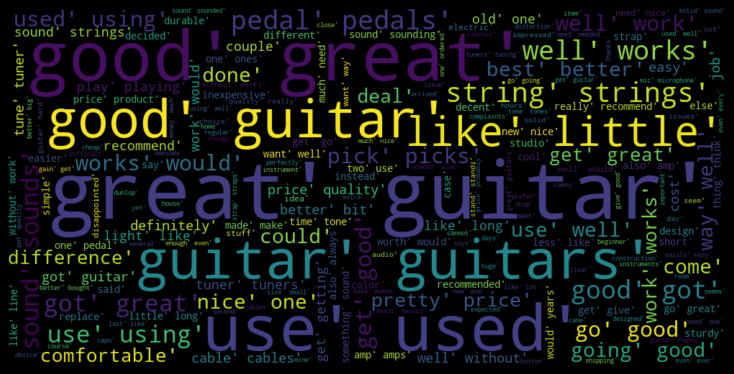

In [68]:
text = l
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = 'english').generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.sentiment, random_state=1)

In [23]:
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (7675,)
y_train shape: (7675,)

x_test shape: (2559,)
y_test shape: (2559,)



In [24]:
vector = CountVectorizer().fit(x_train)
X_train = vector.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))
X_train.shape

X_train:
<7675x17859 sparse matrix of type '<class 'numpy.int64'>'
	with 443976 stored elements in Compressed Sparse Row format>


(7675, 17859)

In [25]:
Vectorizer = CountVectorizer()
X_test = vector.transform(x_test)
print("X_test:\n{}".format(repr(X_test)))
X_test.shape

X_test:
<2559x17859 sparse matrix of type '<class 'numpy.int64'>'
	with 148136 stored elements in Compressed Sparse Row format>


(2559, 17859)

In [26]:
feature_names = vector.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Number of features: 17859


In [27]:
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
print("X_train_tfidf:\n{}".format(repr(X_train_tfidf)))

X_train_tfidf:
<7675x17859 sparse matrix of type '<class 'numpy.float64'>'
	with 443976 stored elements in Compressed Sparse Row format>


## Multinomial Naive Bayes

In [28]:
pipe = Pipeline(steps=[("vect", CountVectorizer()), 
                       ("tfidf", TfidfTransformer()), 
                       ("naiveb", MultinomialNB())])
pipe.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('naiveb', MultinomialNB())])

In [29]:
print("Accuracy on train data:")
accuracy_score(y_train,pipe.predict(x_train))

Accuracy on train data:


0.8776547231270359

In [30]:
print("Accuracy on test data:")
pipe_pred=pipe.predict(x_test)
accuracy_score(y_test,pipe_pred)

Accuracy on test data:


0.8839390386869871

In [32]:
print('f1 score of the test data =', f1_score(y_test, pipe_pred,average='micro'))

f1 score of the test data = 0.8839390386869871


## Logistic Regression

In [33]:
lr_pipe = Pipeline(steps=[("vect", CountVectorizer()), 
                          ("tfidf", TfidfTransformer()),
                          ("lr", LogisticRegression())])
lr_pipe.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('lr', LogisticRegression())])

In [34]:
print("Accuracy on test data:")
lr_pipe.pred=lr_pipe.predict(x_test)
accuracy_score(y_test,lr_pipe.pred)

Accuracy on test data:


0.8866744822196171

In [35]:
print("Accuracy on train data:")
accuracy_score(y_train,lr_pipe.predict(x_train))

Accuracy on train data:


0.8912052117263843

In [36]:
confusion_matrix(y_test,lr_pipe.pred)

array([[   5,   98,    2],
       [   2, 2257,    3],
       [   0,  185,    7]], dtype=int64)

In [37]:
print(classification_report(y_test, lr_pipe.pred))

              precision    recall  f1-score   support

           0       0.71      0.05      0.09       105
           1       0.89      1.00      0.94      2262
           2       0.58      0.04      0.07       192

    accuracy                           0.89      2559
   macro avg       0.73      0.36      0.37      2559
weighted avg       0.86      0.89      0.84      2559



In [38]:
print('f1 score of the test data =', f1_score(y_test, lr_pipe.pred,average='micro'))

Mean squared error = 0.11567018366549434
f1 score of the test data = 0.8866744822196171


## Support Vector Machine

In [39]:
LinearSVC_pipe=Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
LinearSVC_pipe.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_linearSVC', LinearSVC())])

In [40]:
pred=LinearSVC_pipe.predict(x_test)
print("Accuracy on test data:")
accuracy_score(y_test,pred)

Accuracy on test data:


0.8925361469323955

In [41]:
print("Accuracy on train data:")
accuracy_score(y_train,LinearSVC_pipe.predict(x_train))

Accuracy on train data:


0.9787622149837134

In [42]:
confusion_matrix(y_test,pred)

array([[  25,   70,   10],
       [   5, 2236,   21],
       [   9,  160,   23]], dtype=int64)

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.24      0.35       105
           1       0.91      0.99      0.95      2262
           2       0.43      0.12      0.19       192

    accuracy                           0.89      2559
   macro avg       0.66      0.45      0.49      2559
weighted avg       0.86      0.89      0.86      2559



In [44]:
print('f1 score of the test data =', f1_score(y_test, pred,average='micro'))

Mean squared error = 0.12973817897616258
f1 score of the test data = 0.8925361469323955
